

# House Price Predictor
##### By: The hAPI Campers

___


## Data Exploration, Cleaning, and Analysis

___

##### The code below explores, cleans, and analyzes the dataset to prepare it for the Machine Learning model.

In [1]:
# Import dependencies

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

In [2]:
hp_data = pd.read_csv("Resources/House_prices.csv")

In [3]:
hp_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### We already see columns with NaNs, so our next step is to quantify the missing values.

In [4]:
# Calculating percentage of missing values in each column
missing_pct = (hp_data.isnull().sum() / len(hp_data)) * 100

# Filtering to columns that have missing values
missing_pct = missing_pct[missing_pct > 0]

print("Missing value percentage by column:\n")
print(missing_pct.sort_values(ascending = False))

Missing value percentage by column:

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


##### Next, we wanted to take a look at our target variable, SalePrice.

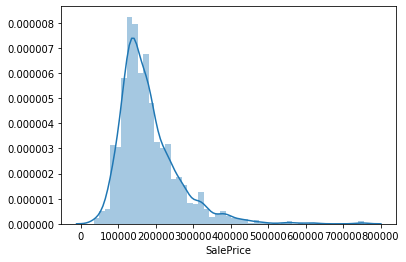

In [5]:
# Plot Sale Price distribution
sns.distplot(hp_data["SalePrice"]);

##### The sale price data is not normally distributed and is right-skewed (long tail on the right).

___

##### Machine learning models work best with normal distributions, so to fix the distribution we can take the log of SalePrice.

In [6]:
# Transform SalePrice variable by taking log
SalePrice_log = np.log(hp_data["SalePrice"])

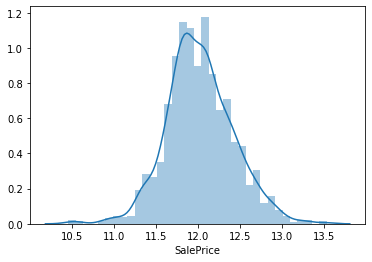

In [7]:
sns.distplot(SalePrice_log);

### Feature Correlations

___


##### What is the correlation between the numerical features and our target variable (Sale Price)?

In [8]:
# Finding numerical and categorical features
numerical_data = hp_data.select_dtypes(include = [np.number])
categorical_data = hp_data.select_dtypes(exclude = [np.number])

print (f'There are {numerical_data.shape[1]} numerical and {categorical_data.shape[1]} categorical features in the training data.')

There are 38 numerical and 43 categorical features in the training data.


In [9]:
# Remove the ID column from numeric data because it's meaningless
del numerical_data["Id"]

# Check if the column was removed
numerical_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

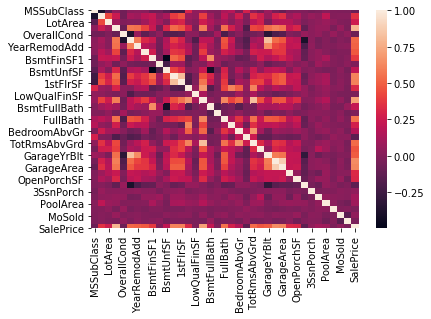

In [10]:
# Calculate the correlations of the features in numerical_data
corr = numerical_data.corr()

# Plot the correlations
sns.heatmap(corr);

### Ad-Hoc Analysis

___

##### How are property sales distributed over time?

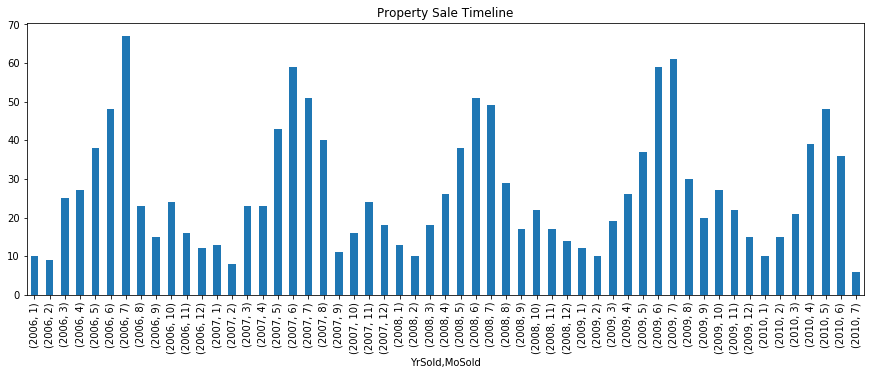

In [11]:
hp_data_grp_date = hp_data.groupby(['YrSold',"MoSold"])
yr_mo_counts = hp_data_grp_date.Id.count()

yr_mo_counts.plot(kind="bar", figsize = (15,5))
plt.title("Property Sale Timeline")
plt.show;

##### How are the properties distributed amongst the neighborhoods?

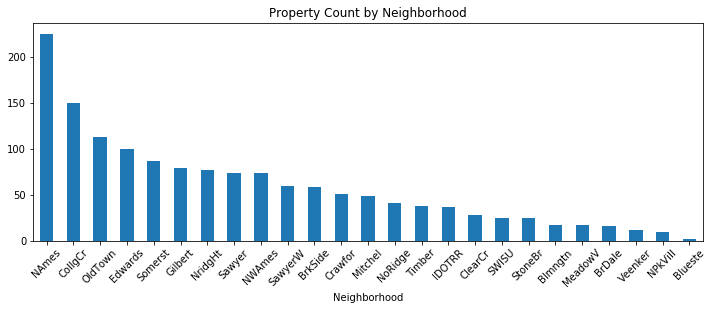

In [12]:
hp_data_grp_nbhood = hp_data.groupby("Neighborhood").Id.count().sort_values(ascending = False)

hp_data_grp_nbhood.plot(kind="bar",figsize=(12,4))
plt.xticks(rotation = 45)
plt.title("Property Count by Neighborhood")
plt.show;

### Feature Analysis

___

##### To find how all of our features are distributed, we use pd.melt( ) to reshape the dataframes so that they can be visualized.

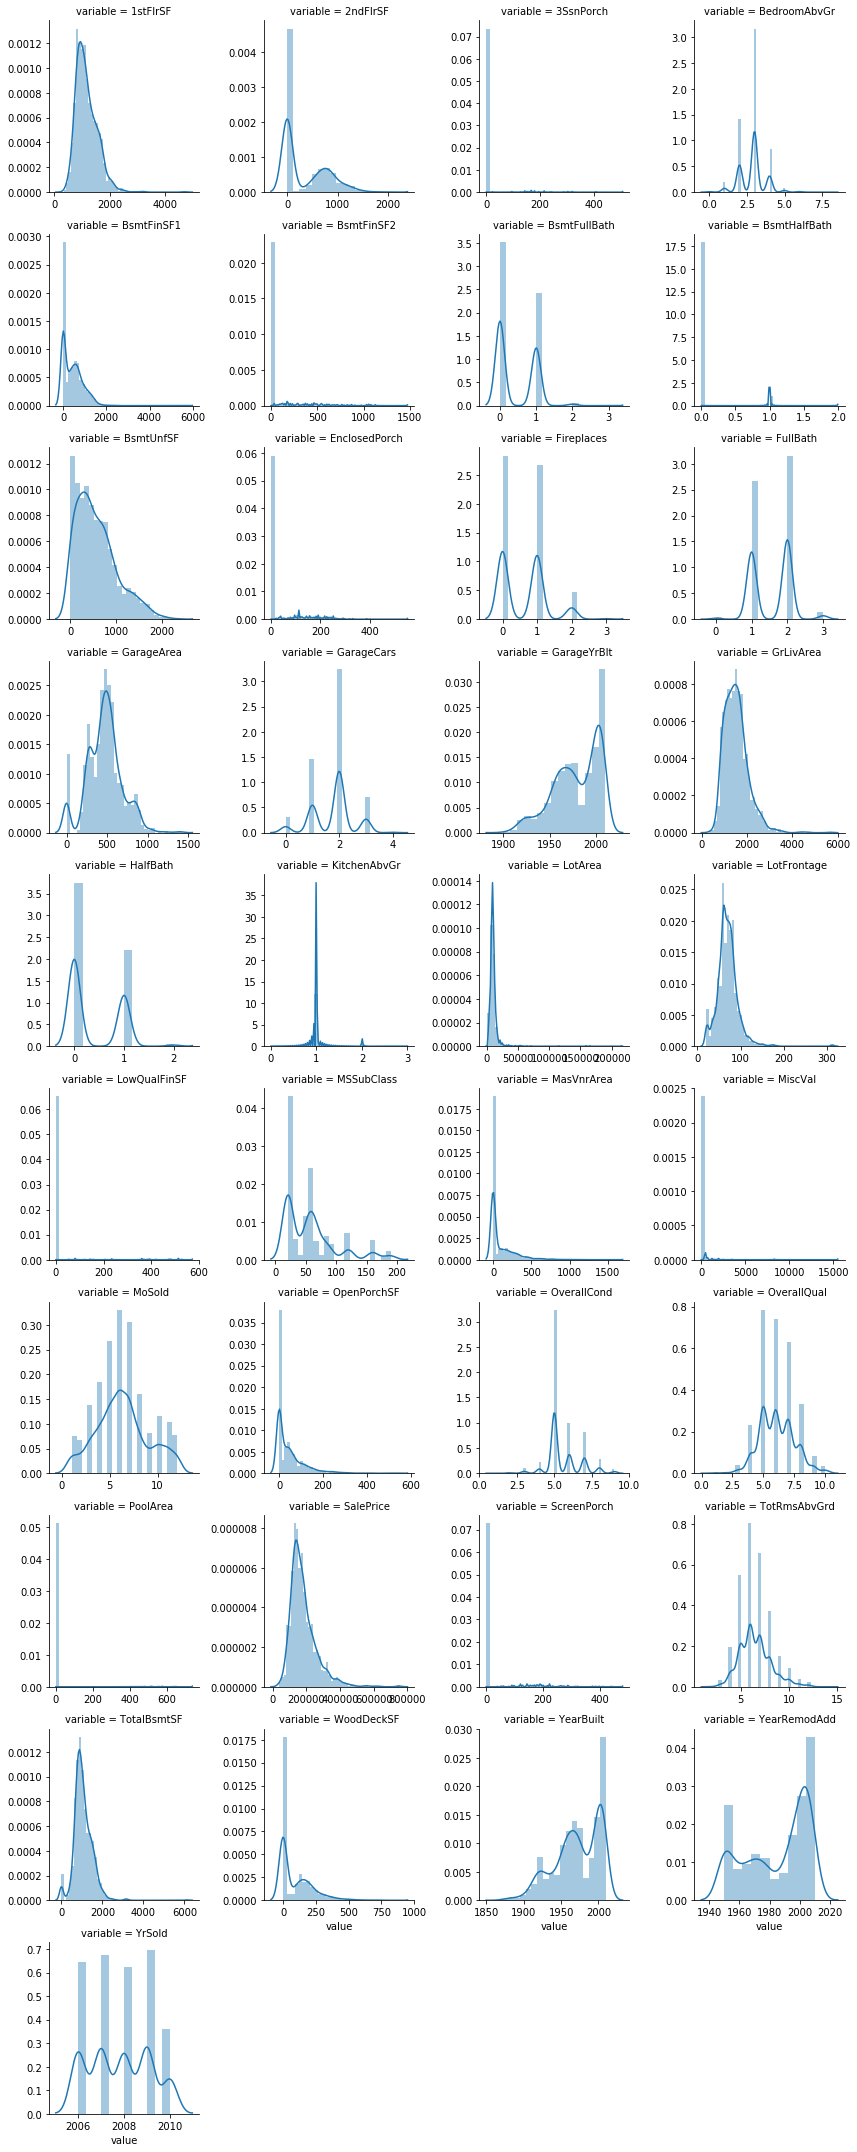

In [13]:
# Melting the numerical training data
hp_melt_num = pd.melt(hp_data, value_vars = sorted(numerical_data))

# Plotting the distributions of the numerical data
## Create a grid for each variable
num_grid = sns.FacetGrid(hp_melt_num, col = "variable", col_wrap = 4, sharex = False, sharey = False)

## Map the values to the grid using distplot because these values are continuous
num_plots = num_grid.map(sns.distplot, 'value')

#### The plots that have multiple vertical bars rather than a more uniform distribution are more like categorical features, so we will convert them accordingly:

In [14]:
hp_data['MSSubClass'] = hp_data.MSSubClass.apply(lambda x: str(x))
hp_data['MoSold'] = hp_data.MoSold.apply(lambda x: str(x))
hp_data['YrSold'] = hp_data.YrSold.apply(lambda x: str(x))

In [15]:
# Finding numerical and categorical features
numerical_data = hp_data.select_dtypes(include = [np.number])
categorical_data = hp_data.select_dtypes(exclude = [np.number])

print (f'There are {numerical_data.shape[1]} numerical and {categorical_data.shape[1]} categorical features in the training data.')

There are 35 numerical and 46 categorical features in the training data.


/Users/alon/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


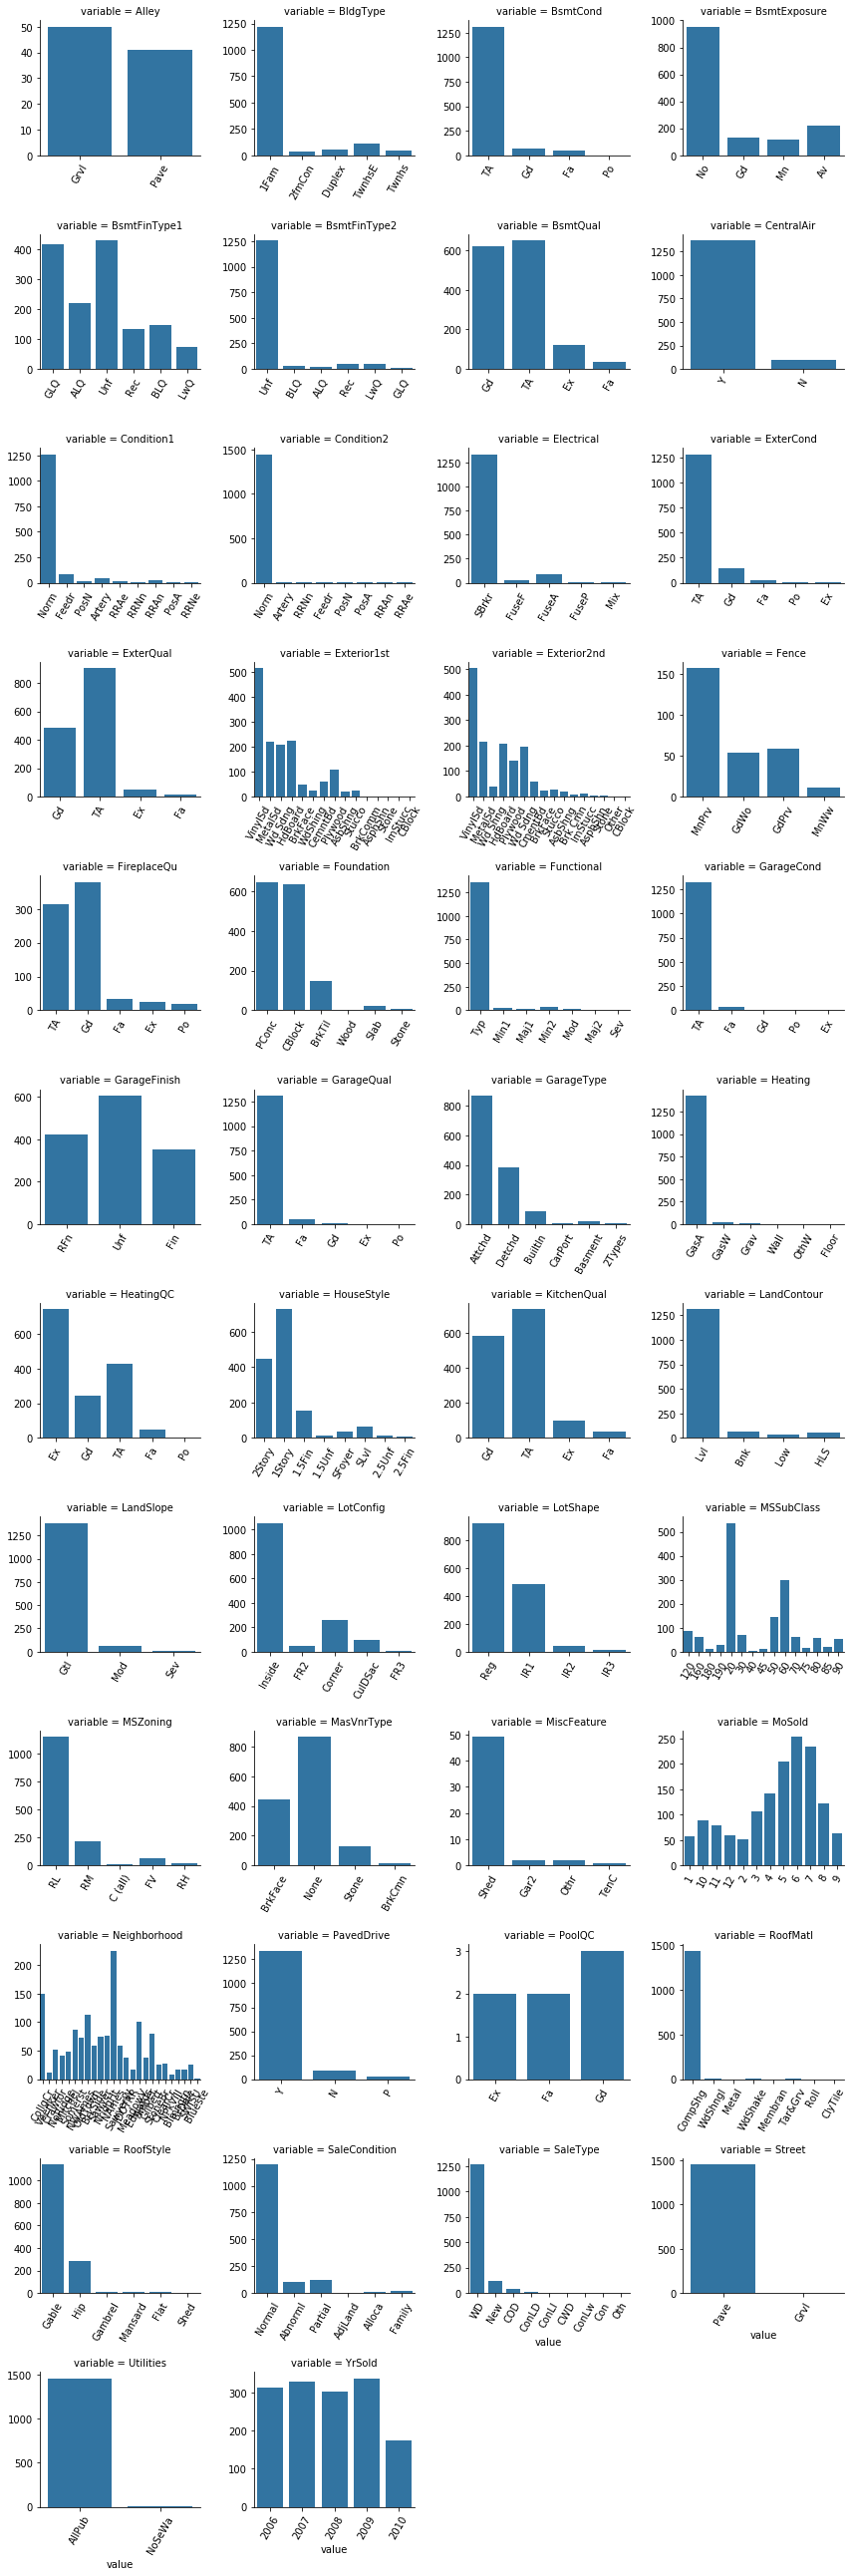

In [16]:
# Melting the categorical training data
hp_melt_cat = pd.melt(hp_data, value_vars = sorted(categorical_data))

# Plotting the distributions of the categorical data
## Create a grid for each variable
cat_grid = sns.FacetGrid(hp_melt_cat, col = "variable", col_wrap = 4, sharex = False, sharey = False)

## Map the values to the grid using countplot because these are categorical
cat_plots = cat_grid.map(sns.countplot, "value")
plt.xticks(rotation="vertical")
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in cat_plots.axes.flat]
cat_plots.fig.tight_layout()
plt.show()

### Numerical Feature Conversion

___

##### To be able to use categorical features in our model, we need to convert them to numerical features. However, we only convert features whose values are a quality/condition/rating/finish. The remaining categorical features have values that are different than these, so we will use the ANOVA method on them.

In [17]:
hp_data.Alley.replace({"Grvl":1, "Pave":2}, inplace=True)
hp_data.BsmtCond.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, inplace=True)
hp_data.BsmtExposure.replace({"No":1, "Gd":2, "Mn":3, "Av":4, "NA":5}, inplace=True)
hp_data.BsmtFinType1.replace({"GLQ":1,"ALQ":2, "Unf":3, "Rec":4, "BLQ":5, "NA":6, "LwQ":7}, inplace=True)
hp_data.BsmtFinType2.replace({"Unf":1, "BLQ":2, "NA":3, "ALQ":4, "Rec":5, "LwQ":6, "GLQ":7}, inplace=True)
hp_data.BsmtQual.replace({"Gd":1, "TA":2, "Ex":3, "NA":4, "Fa":5}, inplace=True)
hp_data.ExterCond.replace({"Po":1,"Fa":2, "TA":3,"Gd":4, "Ex":5}, inplace=True)
hp_data.ExterQual.replace({"Gd":1, "TA":2, "Ex":3, "Fa":4}, inplace=True)
hp_data.FireplaceQu.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5, "NA":6}, inplace=True)
hp_data.Functional.replace({"Typ":1, "Min1":2, "Maj1":3, "Min2":4, "Mod":5, "Maj2":6, "Sev":7}, inplace=True)
hp_data.GarageCond.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5, "NA":6}, inplace=True)
hp_data.GarageFinish.replace({"Unf":1, "RFn":2, "Fin":3, "NA":4}, inplace=True)
hp_data.GarageQual.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5, "NA":6}, inplace=True)
hp_data.HeatingQC.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, inplace=True)
hp_data.KitchenQual.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, inplace=True)
hp_data.LandContour.replace({"Low":1, "HLS":2, "Bnk":3, "Lvl":4}, inplace=True)
hp_data.LandSlope.replace({"Sev":1, "Mod":2, "Gtl":3}, inplace=True)
hp_data.LotShape.replace({"Reg":1, "IR1":2, "IR2":3, "IR3":4}, inplace=True)
hp_data.PavedDrive.replace({"N":1, "P":2, "Y":3}, inplace=True)
hp_data.PoolQC.replace({"Fa":1, "TA":2, "Gd":3, "Ex":4}, inplace=True)
hp_data.Utilities.replace({"AllPub":1, "NoSeWa":2}, inplace=True)

In [18]:
# Replace missing values with "0"
cat_to_num_features = ["Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtQual",
                       "ExterCond", "ExterQual", "FireplaceQu", "Functional", "GarageCond", "GarageFinish",
                       "GarageQual", "HeatingQC", "KitchenQual", "LandContour", "LandSlope", "LotShape", 
                       "PavedDrive", "PoolQC", "Utilities"]

hp_data[cat_to_num_features] = hp_data[cat_to_num_features].fillna(0)

In [19]:
# Finding numerical and categorical features
numerical_data = hp_data.select_dtypes(include = [np.number])
categorical_data = hp_data.select_dtypes(exclude = [np.number])

print (f'There are {numerical_data.shape[1]} numerical and {categorical_data.shape[1]} categorical features in the training data.')

There are 56 numerical and 25 categorical features in the training data.


### Categorical Features

___

##### To find the significance of the categorical features, we will visualize the distribution of the sales prices for each feature. To identify the significant features we will look for the features whose means are very different:

/Users/alon/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


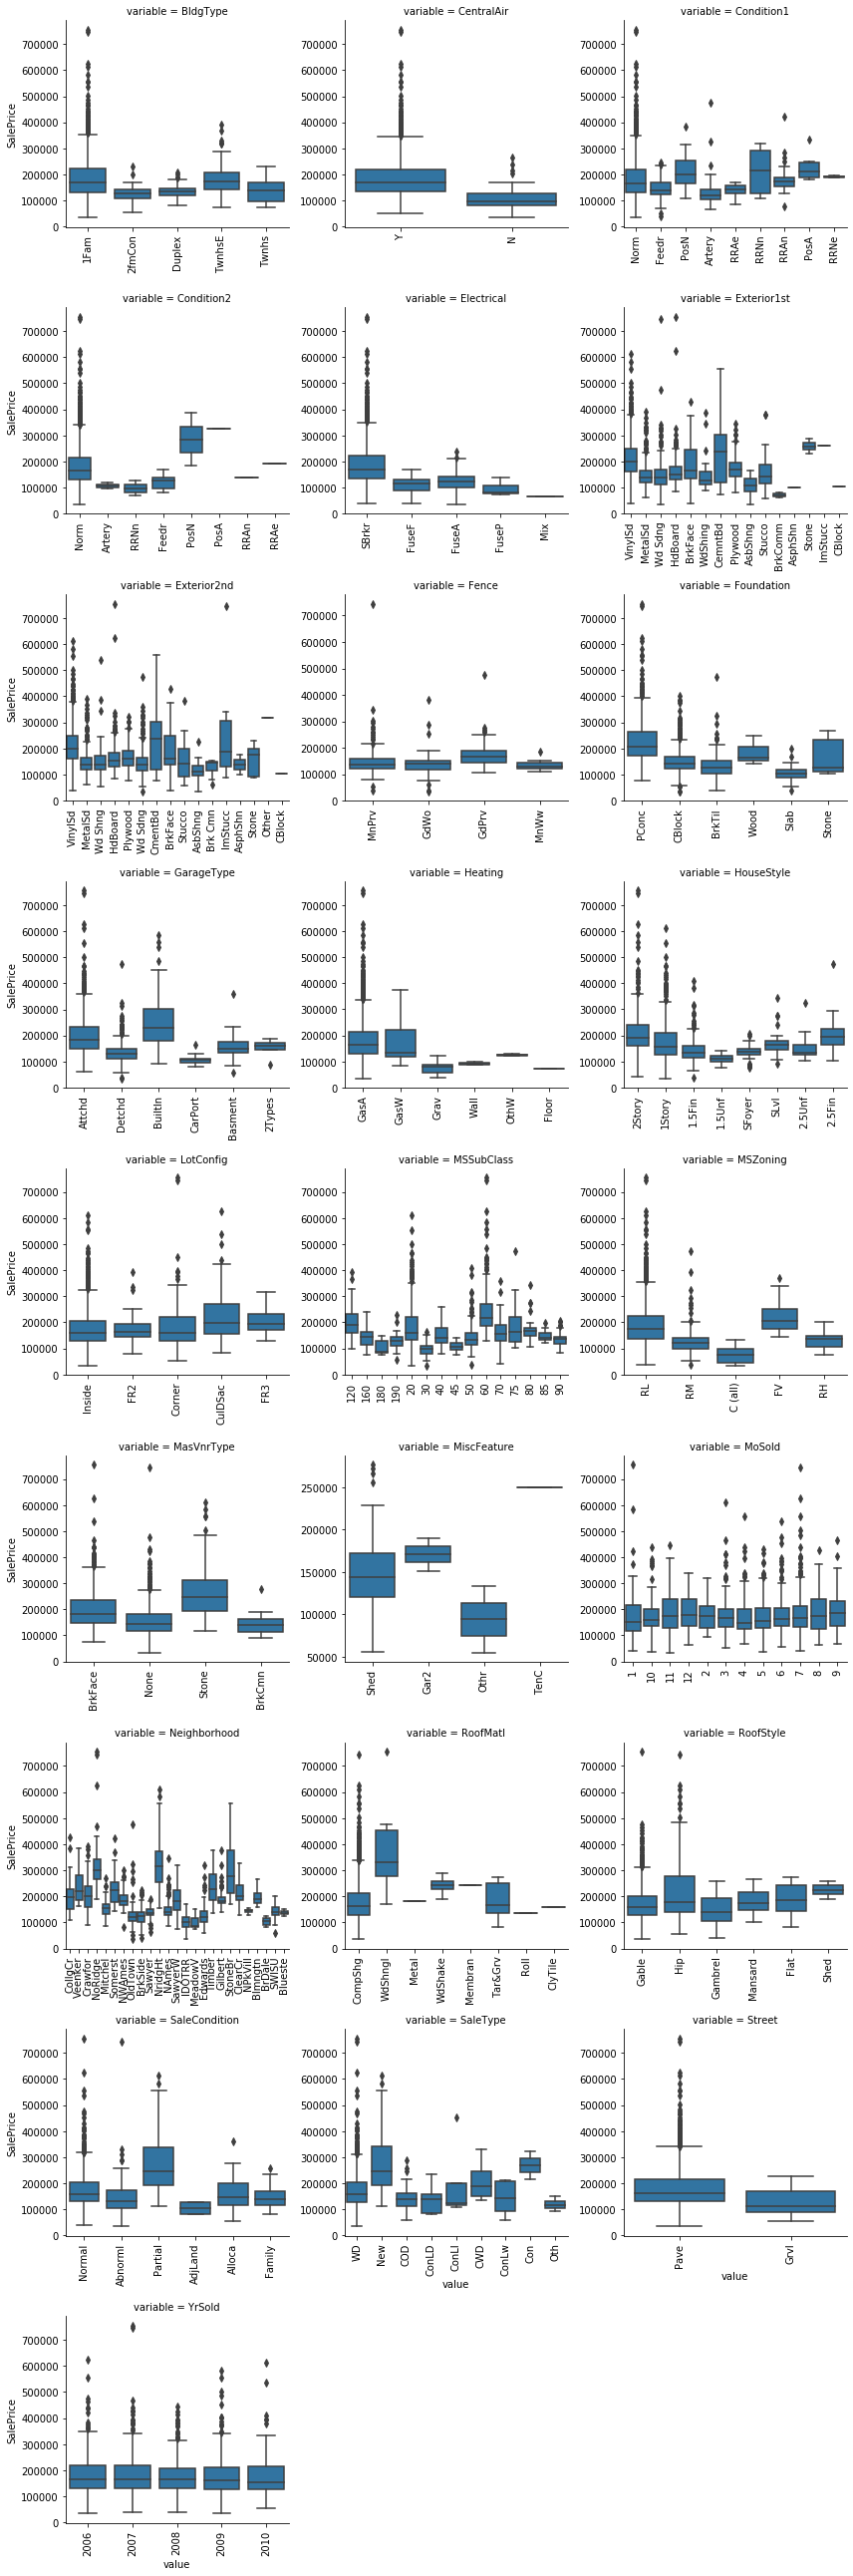

In [20]:
# Create boxplots for each categorical feature
hp_melt_cat = pd.melt(hp_data, id_vars = ['SalePrice'], value_vars = sorted(categorical_data))
cat_grid = sns.FacetGrid(hp_melt_cat, col="variable", col_wrap=3, sharex=False, sharey=False, height=4)

cat_grid = cat_grid.map(sns.boxplot, "value", "SalePrice")
[plt.setp(ax.get_xticklabels(),rotation=90) for ax in cat_grid.axes.flat]
cat_grid.fig.tight_layout()
plt.show();

##### To define significant categorical variables, we will use the ANOVA method to find the F-stat and P-stat values.

In [21]:
# Get a list of the categorical features
cat_features = categorical_data.columns

# Fill NaNs with "Missing" otherwise the ANOVA method won't run
hp_data[cat_features] = hp_data[cat_features].fillna("Missing")

# Create dictionary to store the values
anova = {"feature":[],"f":[],"p":[]}

# Iterate through each category
for cat in cat_features:
    group_prices = []
    
    # Iterate through the features of each category and append all of the SalePrice values
    for group in hp_data[cat].unique():
        group_prices.append(hp_data[hp_data[cat] == group]["SalePrice"].values)
        
    # Calculate the F and P values using f_oneway from SciPy Stats
    f, p = scipy.stats.f_oneway(*group_prices)
    
    # Append the feature and its values to the dictionary
    anova["feature"].append(cat)
    anova["f"].append(f)
    anova["p"].append(p)
    
# Create a dataframe of the ANOVA data
anova = pd.DataFrame(anova)
anova = anova[["feature","f","p"]]
anova.sort_values("p", inplace=True)

In [22]:
anova[anova['p'] < 0.05]

,feature,f,p
4,Neighborhood,71.784865,1.558600e-225
14,Foundation,100.253851,5.791895e-91
18,GarageType,80.379992,6.117026e-87
0,MSSubClass,33.732076,8.662166e-79
13,MasVnrType,84.672201,1.054025e-64
24,SaleCondition,45.578428,7.988268e-44
11,Exterior1st,18.611743,2.586089e-43
12,Exterior2nd,17.500840,4.842186e-43
23,SaleType,28.863054,5.039767e-42
1,MSZoning,43.840282,8.817634e-35


##### Since a smaller p value means greater significance, plotting them is not the most accurate visual representation. To make it easier to understand, we plotted the log of the inverse of the p values. Therefore, this graph represents the most significant features in descending order:

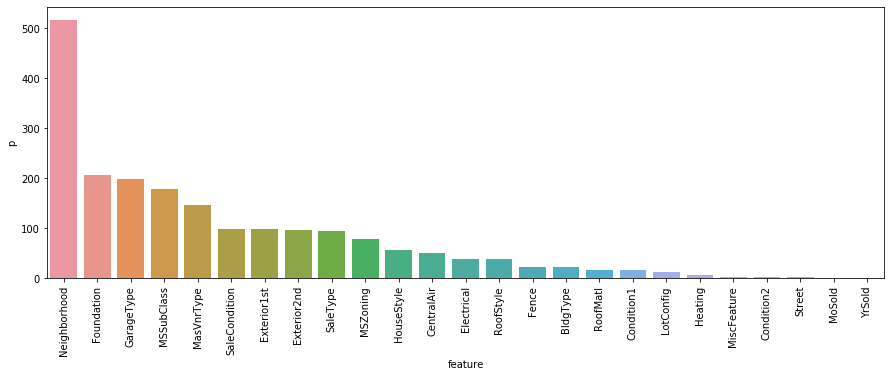

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(anova.feature, np.log(1/anova["p"]))
plt.xticks(rotation='vertical')
plt.show()

### More Data Cleaning

___

##### Here we clean the data more by replacing missing values.

In [24]:
# Find missing values from before
missing_values=(hp_data[cat_features] == "Missing").sum().sort_values(ascending=False)
missing_values[missing_values > 0]

MiscFeature    1406
Fence          1179
GarageType       81
MasVnrType        8
Electrical        1
dtype: int64

In [25]:
# Since the Electrical feature is only missing 1 value, we will replace it with the mode
hp_data.loc[hp_data.Electrical == "Missing", "Electrical"] = hp_data.Electrical.mode()[0]

# Check that it worked
missing_values = (hp_data[cat_features] == "Missing").sum().sort_values(ascending=False)
missing_values[missing_values > 0]

MiscFeature    1406
Fence          1179
GarageType       81
MasVnrType        8
dtype: int64

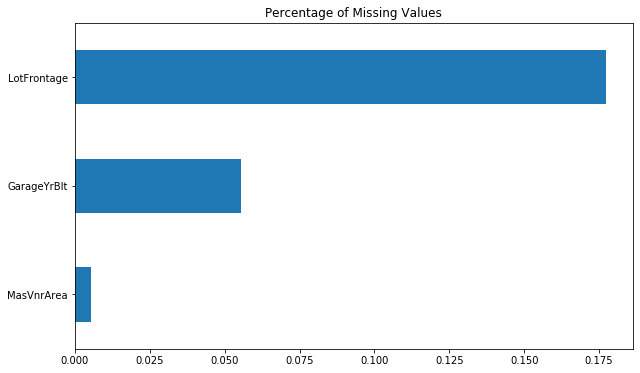

In [26]:
# Find the percentage of NaNs by column
missing_data = hp_data.isnull().sum() / hp_data.shape[0]

# Plot the percentages
missing_data[missing_data > 0].sort_values(ascending=True).plot(kind="barh", figsize=(10,6))
plt.title("Percentage of Missing Values")           
plt.show()

##### Here we fill NaNs with either the median of the data or simply a 0

In [27]:
# Replace missing LotFrontage values with the median of its neighborhood
hp_data.LotFrontage = hp_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# Replace missing GarageYrBlt values with 0
hp_data.GarageYrBlt.fillna(0, inplace = True)

# Replace missing MasVnrArea values with 0
hp_data.MasVnrArea.fillna(0, inplace = True)

##### More cleaning and replacing

In [28]:
# MasVnrType column already had NaNs filled in as "None", so we will correct our changes from the ANOVA method
hp_data.MasVnrType.replace({"Missing":"None"}, inplace=True)

# Replace all None values in MasVnrType that have an Area greater than 1 with BrkFace
hp_data.loc[(hp_data.MasVnrType == "None") & (hp_data.MasVnrArea > 1), "MasVnrType"] = "BrkFace"

# Replace all MasVnrArea values that have an Area equal to 1 with 0
hp_data.loc[(hp_data.MasVnrType == "None") & (hp_data.MasVnrArea == 1), "MasVnrArea"] = 0

# Iterate through the veneer types
for vnr_type in hp_data.MasVnrType.unique():
    
    # Locate rows where the veneer area equals 0 and
    # replace with the mean of the area for the current veneer type in the iteration
    hp_data.loc[(hp_data.MasVnrType == vnr_type) & (hp_data.MasVnrArea == 0), "MasVnrArea"] = \
    hp_data[hp_data.MasVnrType == vnr_type].MasVnrArea.mean()

##### Validating that there is no missing data or duplicates

In [29]:
# Check for missing values
missing_data = hp_data.isnull().sum() / hp_data.shape[0]
missing_data

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64

In [30]:
# Check for duplicates in the Id column

print("Data set duplicate IDs: {}".format(hp_data.duplicated("Id").sum()))

Data set duplicate IDs: 0


##### Visualizing and removing outliers

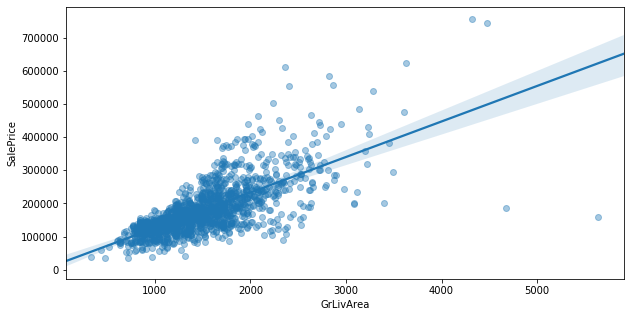

In [31]:
# Look for outliers

plt.figure(figsize=(10,5))
sns.regplot(hp_data.GrLivArea, hp_data.SalePrice, scatter_kws = {"alpha":0.4})
plt.show()

In [32]:
# There are some outliers beyond 4k sqft, so we will remove them
hp_data.drop(hp_data[hp_data.GrLivArea >= 4000].index, inplace = True)

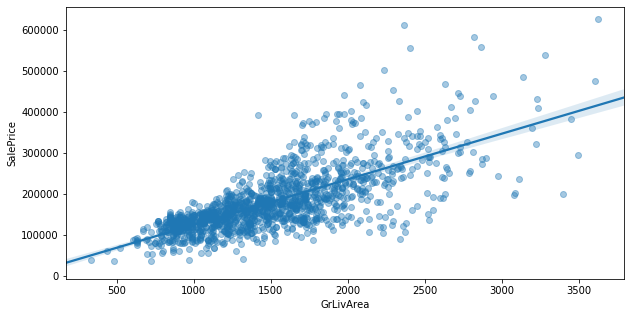

In [33]:
# Check scatter with outliers dropped
plt.figure(figsize=(10,5))
sns.regplot(hp_data.GrLivArea, hp_data.SalePrice, scatter_kws = {"alpha":0.4})
plt.show()

___

# Feature Engineering

___

#### The code below uses existing features to create new features for the model.

In [34]:
# Create new sqft features
hp_data["TotalSF"] = hp_data.TotalBsmtSF + hp_data.GrLivArea
hp_data["TotalFloorSF"] = hp_data["1stFlrSF"] + hp_data["2ndFlrSF"]
hp_data["TotalPorchSF"] = hp_data.OpenPorchSF + hp_data.EnclosedPorch + \
hp_data["3SsnPorch"] + hp_data["ScreenPorch"]

In [35]:
# Create new Boolean features
hp_data["HasBasement"] = hp_data.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
hp_data["HasGarage"] = hp_data.GarageArea.apply(lambda x: 1 if x > 0 else 0)
hp_data["HasPorch"] = hp_data.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
hp_data["HasPool"] = hp_data.PoolArea.apply(lambda x: 1 if x > 0 else 0)
hp_data["WasRemodeled"] = (hp_data.YearRemodAdd != hp_data.YearBuilt).astype(np.int64)
hp_data["IsNew"] = (hp_data.YearBuilt > 2015).astype(np.int64)
hp_data["WasCompleted"] = (hp_data.SaleCondition != "Partial").astype(np.int64)

boolean_features = ["HasBasement", "HasGarage", "HasPorch", "HasPool", "WasRemodeled", "IsNew", "WasCompleted"]

In [36]:
# Total bathrooms
hp_data["TotalBathrooms"] = hp_data.FullBath + hp_data.BsmtFullBath + \
(0.5 * hp_data.HalfBath) + (0.5 * hp_data.BsmtHalfBath)

In [37]:
# Finding numerical and categorical features
numerical_data = hp_data.select_dtypes(include = [np.number])
categorical_data = hp_data.select_dtypes(exclude = [np.number])

print (f'There are {numerical_data.shape[1]} numerical and {categorical_data.shape[1]} categorical features in the training data.')

num_features = numerical_data.columns
cat_features = categorical_data.columns

# Exclude the boolean features from the numerical features
num_features = [f for f in num_features if f not in boolean_features]

There are 67 numerical and 25 categorical features in the training data.


In [38]:
hp_data.to_csv(r'Resources/House_prices_train_FINAL.csv', index = False)

In [39]:
# Add SalePrice to our list of numerical features
features = num_features + ['SalePrice']

# Iterate through the numerical features and take the log because some of the numerical features are skewed
for f in features:
    hp_data.loc[:,f] = np.log1p(hp_data[f])

In [40]:
# Assign the SalePrice column to a variable
y = hp_data['SalePrice']

# Drop the SalePrice and Id columns because they are not features
hp_data.drop('SalePrice', axis=1, inplace=True)
hp_data.drop('Id', axis=1, inplace=True)

# Perform one-hot encoding using get_dummies method
model_data = pd.get_dummies(hp_data).copy()

In [41]:
model_data.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,0.0,0.693147,1.609438,0.693147,1.386294,2.079442,1.791759,7.602900,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,0.0,0.693147,1.609438,0.693147,1.386294,1.945910,2.197225,7.589336,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,0.0,1.098612,1.609438,0.693147,1.386294,2.079442,1.791759,7.601902,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,0.0,1.098612,1.609438,0.693147,1.386294,2.079442,1.791759,7.557995,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,0.0,1.098612,1.609438,0.693147,1.386294,2.197225,1.791759,7.601402,...,0,0,0,1,0,0,0,0,1,0


___

# Machine Learning

___

##### The code below takes the data we've wrangled and runs it through an ML algorithm.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(model_data.copy(), y, random_state=42)
print('Shapes')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Shapes
X_train: (1092, 263)
X_test: (364, 263)
y_train: (1092,)
y_test: (364,)


##### Here we scale the numerical features so that the model handles them with equal weight. If we didn't scale it, then the model might overemphasize certain features and ignore others.

In [43]:
from sklearn.preprocessing import StandardScaler

# Remove ID and SalePrice from num_features
num_features.remove('Id')
num_features.remove('SalePrice')

# To make feature means at 0 with standard deviation of 1
stdsc = StandardScaler()
X_train.loc[:, num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:, num_features] = stdsc.transform(X_test[num_features])

##### Here we create a cross validation function to evaluate the performance of the model. 

In [44]:
from sklearn.model_selection import cross_val_score

def rsme(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

##### Here we use Lasso and GridSearchCV to find the model with the best performance. GridSearchCV runs a model multiple times with different parameters in search of the best performer. We used Lasso to eliminate the least important features.

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [46]:
# Find a good alpha
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0 , 5.0, 10.0, 25.0], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv = 5, param_grid = param_grid, scoring =  'neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

# Find the best alpha
param_grid = {'alpha': [x/100.0 * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv = 5, param_grid = param_grid, scoring = 'neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:.5F} | Test RSME: {:.5F} | alpha: {:.5F}'.format(rsme(lasso, X_train, y_train).mean(), rsme(lasso, X_test, y_test).mean(), alpha))

Lasso -> Train RSME: 0.00865 | Test RSME: 0.00990 | alpha: 0.00005


##### Here we create a dataframe of the most important features based on the best GridSearch result. We then dropped all features with a coefficient of zero, which means they are meaningless to the model.

Lasso dropped 169 of 263 features.


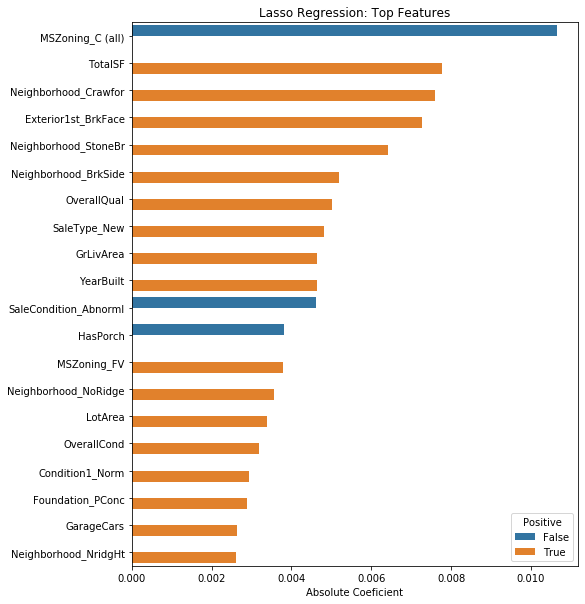

In [47]:
import seaborn as sns
coefs = pd.DataFrame({'coefs':lasso.coef_, 'Positive':lasso.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('Lasso dropped {} of {} features.' .format(
    sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot(top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('Lasso Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

##### XGBoost is a tree-based model with many parameters. We use it as a regressor.

In [48]:
#Apply Machine learning  XGBoost
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                      gamma=0.0,
                      learning_rate=0.1,
                      max_depth=6,
                      min_child_weight=1.5,
                      n_estimators=7200,
                      reg_alpha=0.9,
                      reg_lambda=0.6,
                      subsample=0.2,
                      seed=42,
                      verbosity=1)

regr.fit(X_train[top_coefs.index],y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=7200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.9,
             reg_lambda=0.6, scale_pos_weight=1, seed=42, subsample=0.2,
             tree_method='exact', validate_parameters=1, verbosity=1)

##### Here we test the model and evaluate its performance.

In [49]:
from sklearn.metrics import mean_squared_error
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

# Running our predictions on training set
y_pred = regr.predict(X_test[top_coefs.index])

print("XGBoost score on training set: ", rmse(y_test, y_pred))

XGBoost score on training set:  0.015304470724734202
